# Just exploring some potential datasets

## Things to add
- Outlier removal
- Correlated columns
- Balance datasets?

## 
- Unsupervised classifiers KNN, 
- Ordinal encoding labels

In [58]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#list_avaliable_datasets()

In [59]:
# Dataset that seems useful
dataset_id = {"iris": 53, # Seem ok 
              "heart_disease": 45, # Seems ok
              "wine_quality": 186, # Seems ok
              "breast_cancer_wisconsin": 17, # Seems ok
              "car_evaluation": 19, # Seems ok, but might have some highly correlated columns
              "abalone": 1, # Seems ok, 1 outlier in height?
              "mushroom": 73, # Seems ok, only categorical data, missing values
              "statlog" : 144, # Seems ok, lots of categorical data
              "credit_approval" : 27, # Seems ok
              "banknote_authentication" : 267, # Seems ok
              "zoo" : 111, # Seems ok, almost only binominal data
              "raisins" : 850, # Seems ok
              "maternal_health_risk" : 863, # Seems ok
              "balance_scale" : 12, # Seems ok
              "land_mines" : 763,
              "hcv" : 571, 
              "ilpd" : 225,
              "acute_inflamations" : 184,
              "ecoli" : 39,
              "mammographic_mass" : 161,
              "hayes_roth" : 44
              }
TEST_SIZE = 0.2
RANDOM_SEED = 42
K_FOLDS = 3

# Load data

### Turn categorical features into numerical

In [60]:
def encode_categorical_features(X, encoder):
    X = encoder.fit_transform(X)
    return X

In [61]:
def import_dataset(uci_id, encoder):
    dataset = fetch_ucirepo(id=uci_id) 
    print(dataset.metadata)
    data_types = dataset.variables["type"]
    data_names = dataset.variables["name"]
    data_roles = dataset.variables["role"]
    X = dataset.data.features
    y = dataset.data.targets
    print(data_names)
    print("Column names in X:", X.columns.tolist())
    categorical_columns = []
    #categorical_columns = [data_names[i] for i, type in enumerate(data_types) if (type == "Categorical" or type == "Binary") and data_names[i] != "class"]
    for i, type in enumerate(data_types):
        # print(data_names[i], type, data_roles[i])
        if (type == "Categorical" or type == "Binary") and data_names[i] != "class" and data_roles[i] == "Feature":
            categorical_columns.append(data_names[i])
    # Encode catorical features
    X.loc[:, categorical_columns] = encode_categorical_features(X[categorical_columns], encoder)
    # Remove rows with missing values
    X = X.dropna()
    y = y.loc[X.index]
    return X, y


In [62]:
ordinal_encoder = OrdinalEncoder()
X, y = import_dataset(dataset_id["ecoli"], ordinal_encoder)
#print(type(X))
#print(y)
#print(X)

{'uci_id': 39, 'name': 'Ecoli', 'repository_url': 'https://archive.ics.uci.edu/dataset/39/ecoli', 'data_url': 'https://archive.ics.uci.edu/static/public/39/data.csv', 'abstract': 'This data contains protein localization sites', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 336, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': ['Sequence'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5388M', 'creators': ['Kenta Nakai'], 'intro_paper': {'ID': 391, 'type': 'NATIVE', 'title': 'A Probabilistic Classification System for Predicting the Cellular Localization Sites of Proteins', 'authors': 'P. Horton, K. Nakai', 'venue': 'Intelligent Systems in Molecular Biology', 'year': 1996, 'journal': None, 'DOI': None, 'URL': 'https://www.semanticscholar.org/paper/A-Probabilistic-Classific

/var/folders/s9/bg_8ddhj38x2g3svq29mlmcc0000gn/T/ipykernel_99538/3720503759.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, categorical_columns] = encode_categorical_features(X[categorical_columns], encoder)


# Train test split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

## Cross validation

In [64]:
log_reg = LogisticRegression(max_iter=1000)

# Ravel to convert from (len, 1) shape to (len,), warning from sk-learn
Y_train = np.ravel(Y_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

scores = cross_val_score(
    log_reg, X_scaled, Y_train, scoring='accuracy', cv=5)
# accuracy
print('Accuracy: %.3f ,\nStandard Deviations :%.3f' %
      (np.mean(scores), np.std(scores)))

#TODO check if this is better implementation
# k_folds  = KFold(n_splits=K_FOLDS)
# for train_idx, valid_idx in k_folds.split(X_train):
#     continue

Accuracy: 0.858 ,
Standard Deviations :0.055


/Users/emillundin/anaconda3/envs/D7041EMiniProject/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [65]:
# Testing importing the first 25 UCI datasets
# for i in range(1, 25):
#     try:
#         X, y = import_dataset(i, ordinal_encoder)
#     except Exception as e:
#         if "DatasetNotFoundError" in str(type(e)):
#             print(f"Dataset {i} is not available for import. Skipping. Error: {str(e)}")
#         else:
#             print(f"An unexpected error occurred with dataset {i}: {str(e)}")

In [66]:
def test_classifier(clf, clf_name, params, X_train, y_train, X_test, y_test):
    # https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
    pipe = Pipeline([('scaler', StandardScaler()), (clf_name, clf)])
    scoring = 'accuracy'
    gs_knn = GridSearchCV(pipe,
                        param_grid=params,
                        scoring=scoring,
                        cv=5)

    # Ravel to convert from (len, 1) shape to (len,), warning from sk-learn
    y_train = np.ravel(y_train)

    gs_knn.fit(X_train, y_train)
    print(gs_knn.best_params_)
    # find best model score
    y_pred_train = gs_knn.best_estimator_.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    # TODO
    train_f1 = f1_score(y_train, y_pred_train, average="weighted")
    #train_score = gs_knn.score(X_train, y_train)

    # test on test set
    y_pred_test = gs_knn.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    # TODO
    test_f1 = f1_score(y_test, y_pred_test, average="weighted")
    #test_score = gs_knn.score(X_test, y_test)

    print(f"{clf_name}, Train accuracy = {train_acc}, Test accuracy = {test_acc}")
    print(f"{clf_name}, Train f1-score = {train_f1}, Test f1-score = {test_f1}")

    # Confusion Matrix
    print("Confusion Matrix for train set")
    cm_train = confusion_matrix(y_train, y_pred_train, labels=gs_knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=gs_knn.classes_)
    disp.plot()
    plt.show()

    print("Confusion Matrix for test set")
    cm_test = confusion_matrix(y_test, y_pred_test, labels=gs_knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=gs_knn.classes_)
    disp.plot()
    plt.show()

# K-means for classification

In [67]:
# Source: https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
# But this use another model for predicting 

from scipy.stats import mode
n_clusters = len(np.unique(Y_train))
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.predict(X_test)
# y_labels_train = kmeans.labels_

# X_train['km_clust'] = y_labels_train
# X_test['km_clust'] = cluster_labels

# print('Accuracy: {}'.format(accuracy_score(Y_test, cluster_labels)))
# print(kmeans.score(X_test))
# print(cluster_labels, Y_test)


# Also used ChatGPT to fix 
Y_train = encode_categorical_features(Y_train.reshape(-1, 1), ordinal_encoder)
cluster_labels = kmeans.predict(X_train)
labels_map = {}
for cluster in np.unique(cluster_labels):
    class_label = mode(Y_train[cluster_labels == cluster])[0][0]
    labels_map[cluster] = class_label
print("Cluster to Class Mapping:", labels_map)
# accuracy = accuracy_score(Y_train, cluster_labels)
# print("K-Means Classifier Accuracy:", accuracy)
test_clusters = kmeans.predict(X_test)
Y_test = encode_categorical_features(Y_test, ordinal_encoder)
y_pred = np.array([labels_map[cluster] for cluster in test_clusters])

# print(y_pred)
# print(Y_test)

accuracy = accuracy_score(Y_test, y_pred)
print("K-Means Classifier Accuracy:", accuracy)

Cluster to Class Mapping: {np.int32(0): np.float64(4.0), np.int32(1): np.float64(0.0), np.int32(2): np.float64(7.0), np.int32(3): np.float64(0.0), np.int32(4): np.float64(6.0), np.int32(5): np.float64(7.0), np.int32(6): np.float64(1.0), np.int32(7): np.float64(1.0)}
K-Means Classifier Accuracy: 0.5147058823529411


/Users/emillundin/anaconda3/envs/D7041EMiniProject/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.8917910447761194, Test accuracy = 0.6176470588235294
knn, Train f1-score = 0.8865770628196644, Test f1-score = 0.6024582967515365
Confusion Matrix for train set


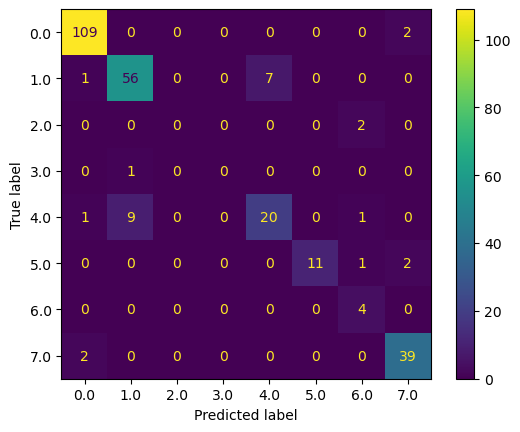

Confusion Matrix for test set


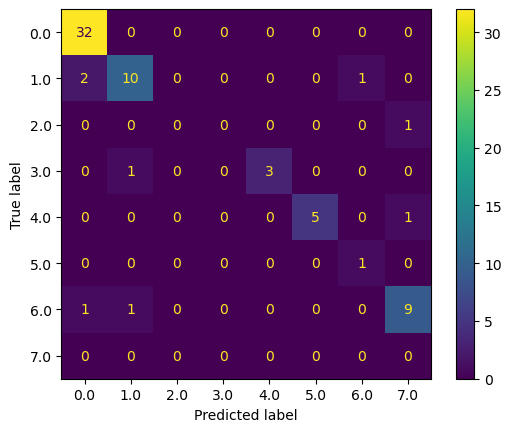

In [68]:
knn = KNeighborsClassifier()
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

test_classifier(knn, "knn", params, X_train, Y_train, X_test, Y_test)